#**Capstone III Notebook - Tami Idol, EI**
###Earthquakes can strike suddenly and without warning. An earthquake is a violent and abrupt shaking of the ground, caused by movement between tectonic plates along a fault line in the earth’s crust. 
###Data from the National Earthquake Information Center (NEIC) includes 23412 records of every earthquake with a reported magnitude 5.5 or higher from 1965 to 2016.  There are 21 columns, of which only ('Date', 'Latitude',	'Longitude', 'Depth',	'Magnitude') will be used for this analysis.  
###Earthquake prediction is a branch of the science of seismology concerned with the specification of the time, location, and magnitude of future earthquakes within stated limits. (Geller, 1997)  Nearly 750,000 deaths were caused by earthquakes globally from 1998 – 2017.  Although earthquakes cannot be prevented, the risks can be mitigated.  Ultimately, scientists would be able to predict when and where an earthquake was going to occur with enough time to move people out of harm’s way.
###This research will look at historical earthquake data worldwide (1965 to 2016) to determine if correlations, or differences in statistical means exist between earthquake locations, depths, and magnitudes to provide insight into future risks.
The dataset is available on Kaggle.com and will be imported in our Jupiter notebook trough the link [Significant Earthquakes, 1965-2016](https://www.kaggle.com/datasets/usgs/earthquake-database).


## Our study focuses on answering the following:
1. Do correlations exist between Latitude/Longitude locations, and the depths and magnitudes. (Pearson r tests for correlation)
>By considering the Latitude or Longitude position on the Earth and the depths of historical earthquakes, we can pose our hypothesis:
>>**Hypothesis I**
Null Hypothesis I (H0): The Latitude of historical earthquakes are not correlated with the Longitudes they occur.  This means, we are assuming that Longitudes do not drive the Latitudes of the earthquake.
Alternate Hypothesis I (Ha): The Latitude of historical earthquakes are correlated with the Longitudes they occur.
>>
>>**Hypothesis II**
Null Hypothesis I (H0): The depths of historical earthquakes are not correlated with Latitude.  This means, we are assuming that Latitude do not drive the depth of the earthquake.
Alternate Hypothesis I (Ha): The depths of historical earthquakes are correlated with Latitude.
>>
>>**Hypothesis III**
Null Hypothesis II (H0): The depths of historical earthquakes are not correlated with Longitude.  This means, we are assuming that Longitude do not drive the depth of the earthquake.
Alternate Hypothesis II (Ha): The depths of historical earthquakes are correlated with Longitude.


2.   Is there a significant difference between the means of depths between the Northern & Southern Hemispheres. (t-test to see if there is a significant difference in the means of depth occurrences between the Northern and Southern Hemispheres)
>>**Hypothesis IIII**
Null Hypothesis III (H0): The depths of historical earthquakes are the same for the Northern Hemisphere and Southern Hemisphere.
Alternate Hypothesis III (Ha): The depths of historical earthquakes are different for the Northern Hemisphere and Southern Hemisphere.





#First, lets take a look at the data

#Import Modules

In [77]:
#  imports and allias modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import datetime
import math

# Matplotlib for additional customization
import matplotlib.pyplot as plt # visualization library
import seaborn as sns
#set our style background as gray
sns.set() 

# Suppress warnings (warnings do not prevent the code from executing)
import warnings            
warnings.filterwarnings("ignore") 

#Bringing in the Dataset

In [41]:
# 1. Importing the dataset from google drive into Colab

url = 'https://drive.google.com/file/d/15EdjGntER-qlnIXTr3RM9hyB-WiOUJfn/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url)

#Explore & Wrangle the Dataset

In [42]:
#See information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [43]:
#return the shape of the array in (rows, columns) format
data.shape

(23412, 21)

In [44]:
#View the first 5 rows of data
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic




##> Date Validation



In [45]:
#All dates should be either 8, 9, or 10 characters in length
date_lengths = data.Date.str.len()
date_lengths.value_counts()

9     14158
8      5024
10     4227
24        3
Name: Date, dtype: int64

In [46]:
#Get the indices of the 3 rows with bad dates
indices = np.where([date_lengths == 24])[1]
print('Indices with corrupted data:', indices)
data.loc[indices]

Indices with corrupted data: [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


In [47]:
#Replace the bad dates with date strings
data.loc[3378, 'Date'] = '02/23/1975'
data.loc[7512, 'Date'] = '04/28/1985'
data.loc[20650, 'Date'] = '03/13/2011'

In [48]:
#Recheck that the dates have been replaced
indices = np.where([date_lengths == 24])[1]
data.loc[indices]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,02/23/1975,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,04/28/1985,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,03/13/2011,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed



##> Event Type Validation



In [49]:
#check to see if all of the rows have Earthquake as 'Type'
data['Type'].unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

In [50]:
#Count how many rows are not a record of an Earthquake
data['Type'].value_counts()

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

In [51]:
#Remove "Type" not = Earthquake
Earthquakes = (data['Type'] == 'Earthquake')
data = data.iloc[Earthquakes.values]

In [52]:
#Test if non Earthquake records have been removed
data['Type'].value_counts()

Earthquake    23232
Name: Type, dtype: int64



##> Narrow fields down to ones needed for analysis



In [53]:
#Get names of column titles to narrow the dataset down to columns of interest
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [54]:
#Create filter to return only columns ['Date', 'Latitude', 'Longitude', 'Depth', 'Magnitude']
dc = data[['Date', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
dc

,Date,Latitude,Longitude,Depth,Magnitude
0,1/2/1965,19.2460,145.6160,131.60,6.0
1,1/4/1965,1.8630,127.3520,80.00,5.8
2,1/5/1965,-20.5790,-173.9720,20.00,6.2
3,1/8/1965,-59.0760,-23.5570,15.00,5.8
4,1/9/1965,11.9380,126.4270,15.00,5.8
...,...,...,...,...,...
23407,12/28/2016,38.3917,-118.8941,12.30,5.6
23408,12/28/2016,38.3777,-118.8957,8.80,5.5
23409,12/28/2016,36.9179,140.4262,10.00,5.9
23410,12/29/2016,-9.0283,118.6639,79.00,6.3


In [55]:
#Information for new dataframe
dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23232 entries, 0 to 23411
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       23232 non-null  object 
 1   Latitude   23232 non-null  float64
 2   Longitude  23232 non-null  float64
 3   Depth      23232 non-null  float64
 4   Magnitude  23232 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.1+ MB


In [56]:
#See Descriptive Statistics
dc.describe()

,Latitude,Longitude,Depth,Magnitude
count,23232.000000,23232.000000,23232.000000,23232.000000
mean,1.386383,39.746049,71.313913,5.882763
std,29.929060,125.751903,122.968384,0.424032
min,-77.080000,-179.997000,-1.100000,5.500000
25%,-18.719500,-76.366500,15.000000,5.600000
50%,-3.680000,106.349000,33.000000,5.700000
75%,24.968500,145.290250,54.800000,6.000000
max,86.005000,179.998000,700.000000,9.100000


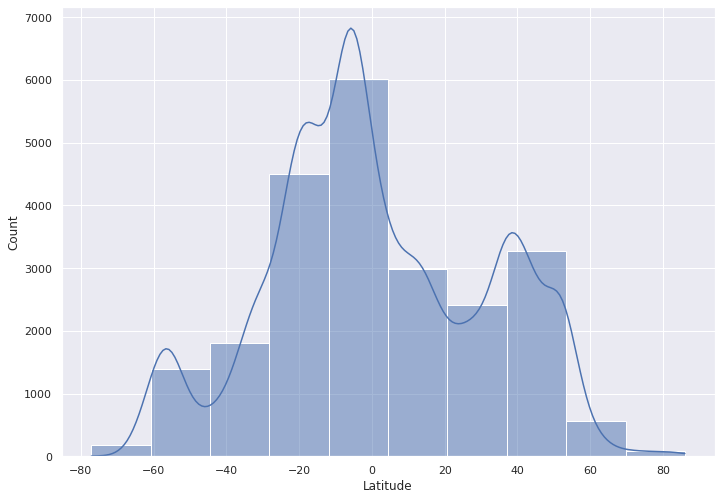

In [57]:
#Histogram of earthquakes at all Latitudes
sns.histplot(dc['Latitude'], bins = 10, kde = True)

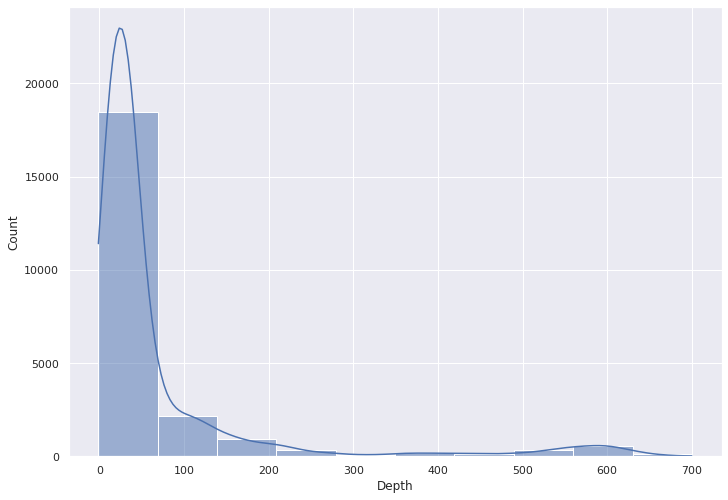

In [58]:
#Histogram of depths at all Latitudes
sns.histplot(dc['Depth'], bins = 10, kde = True)



##> Add column



In [59]:
#Add a column called Hemisphere to show 'NH' if Latitude is >0 & 'SH' if <0
dc['Hemisphere'] = np.where(dc['Latitude'] > 0, 'NH', 'SH')
dc.head()

,Date,Latitude,Longitude,Depth,Magnitude,Hemisphere
0,1/2/1965,19.246,145.616,131.6,6.0,NH
1,1/4/1965,1.863,127.352,80.0,5.8,NH
2,1/5/1965,-20.579,-173.972,20.0,6.2,SH
3,1/8/1965,-59.076,-23.557,15.0,5.8,SH
4,1/9/1965,11.938,126.427,15.0,5.8,NH


In [60]:
#Determine how many Earthquake are in the Northern Hemisphere & Southern Hemisphere
dc.value_counts('Hemisphere')

Hemisphere
SH    12764
NH    10468
dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fab022401d0>,
      dtype=object)

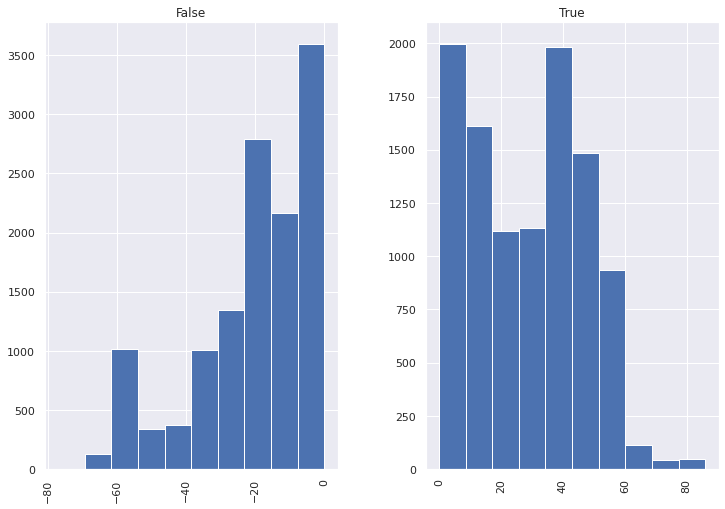

In [61]:
#Individual histograms
dc.hist('Latitude',dc['Hemisphere']=='NH')

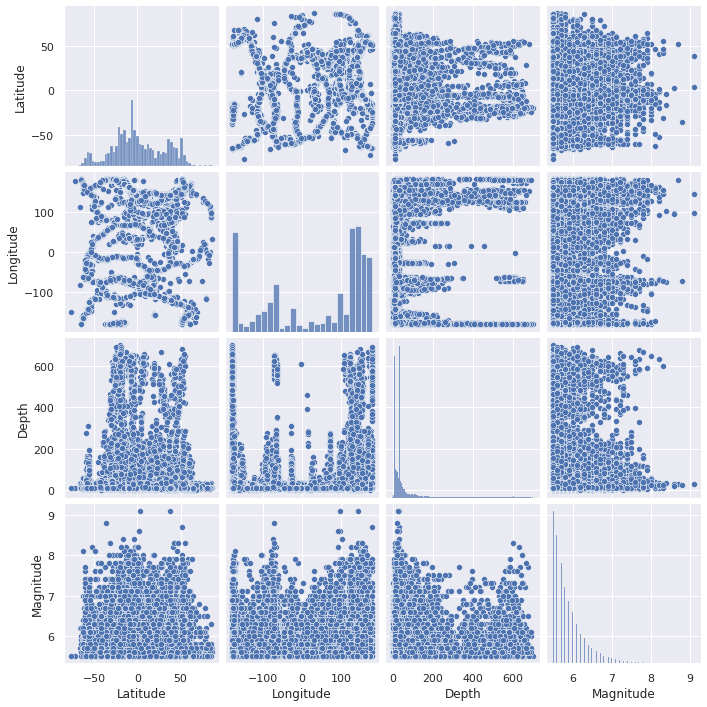

In [62]:
sns.pairplot(dc)

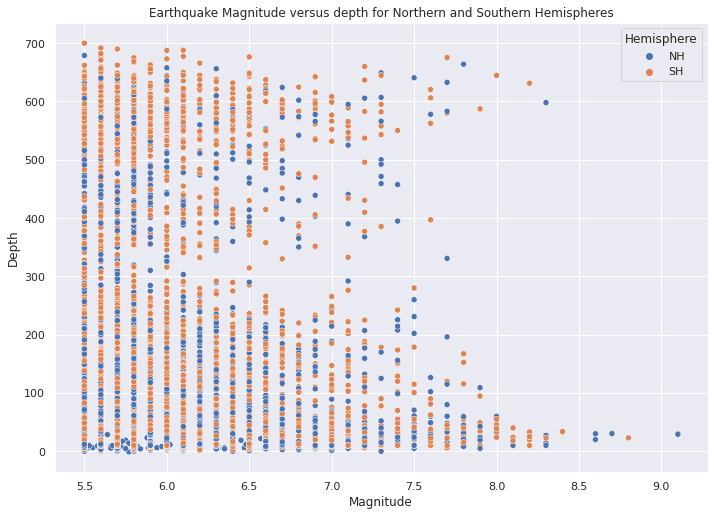

In [63]:
#Make a scatterplot of magnitude and depth, with Hemisphere represented by color
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x = 'Magnitude', y = 'Depth', hue = 'Hemisphere', data = dc)
plt.title('Earthquake Magnitude versus depth for Northern and Southern Hemispheres')
plt.show()

#**Analyse the Dataset**


# Our study focuses on analyzing:
1. Do correlations exist between Latitude/Longitude locations, and the depths and magnitudes. (Pearson r tests for correlation)
2. Is there a significant difference between the means of depths between the Northern & Southern Hemispheres. (t-test to see if there is a significant difference in the means of depth occurrences between the Northern and Southern Hemispheres) 



##1. Let's start with correlation

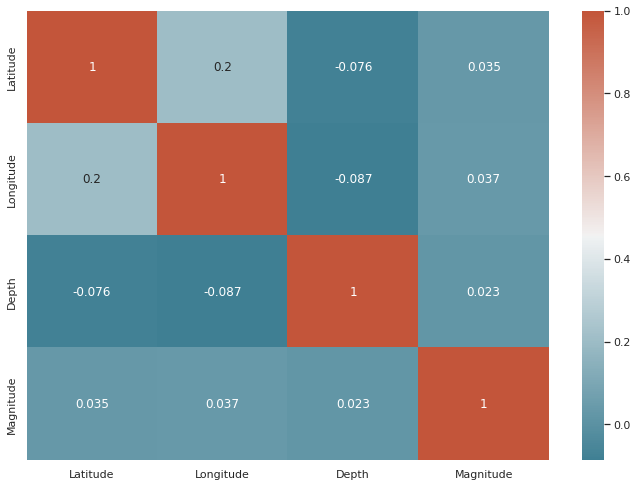

In [64]:
#calculate correlation matrix to visualize how the attributes are related to each other or with the target variable
corr = dc.corr() # plot the heatmap
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

###**Hypothesis I**
>>**Hypothesis I**
Null Hypothesis I (H0): The Latitude of historical earthquakes are not correlated with the Longitudes they occur.  This means, we are assuming that Longitudes do not drive the Latitudes of the earthquake.
Alternate Hypothesis I (Ha): The Latitude of historical earthquakes are correlated with the Longitudes they occur.

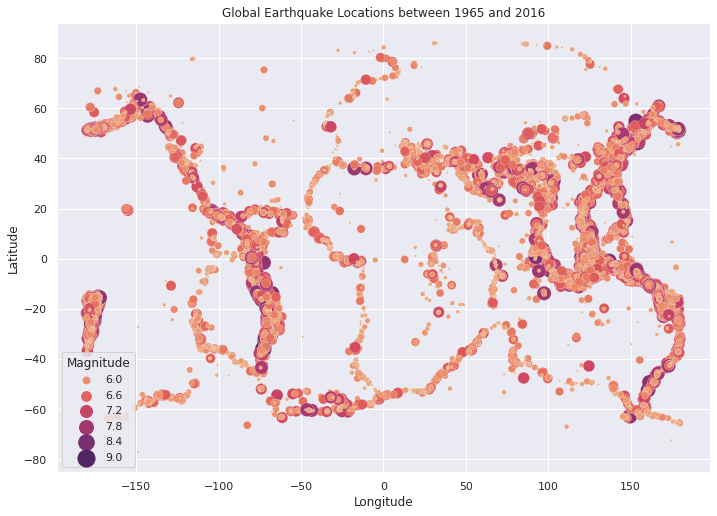

In [65]:
#Make a scatterplot of Latitude and Longitude, showing magnitude by color and size
minsize = min([5])
maxsize = max([300])
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("flare", as_cmap=True)
sns.scatterplot(x = 'Longitude', y = 'Latitude', size = 'Magnitude', sizes = (minsize, maxsize), hue = 'Magnitude', palette = (palette), data = dc)
plt.title('Global Earthquake Locations between 1965 and 2016')
plt.show()

###Pearson correlation coefficient (r) for measuring a linear correlation between  Earthquake Latitude and Longitude

In [66]:
stats.pearsonr(dc['Latitude'], dc['Longitude'])

(0.20267682775188436, 6.684088357237405e-214)



###**RESULTS**---A Pearson product-moment correlation coefficient was computed to assess the relationship between Latitude and Longitude of historical earthquakes in the dataset.  There was a weak positive correlation between the two variables, r = 0.203.  The test is significant (p= 6.68e-214). The Latitude of an earthquake is correlated with the Longitude at which it occurs. Although the correlation is not linear, there is a definate pattern that outlines the tectonic plates of the Earth.





###**Hypothesis II**
>>**Hypothesis II**
Null Hypothesis I (H0): The depths of historical earthquakes are not correlated with Latitude.  This means, we are assuming that Latitude do not drive the depth of the earthquake.
Alternate Hypothesis I (Ha): The depths of historical earthquakes are correlated with Latitude.

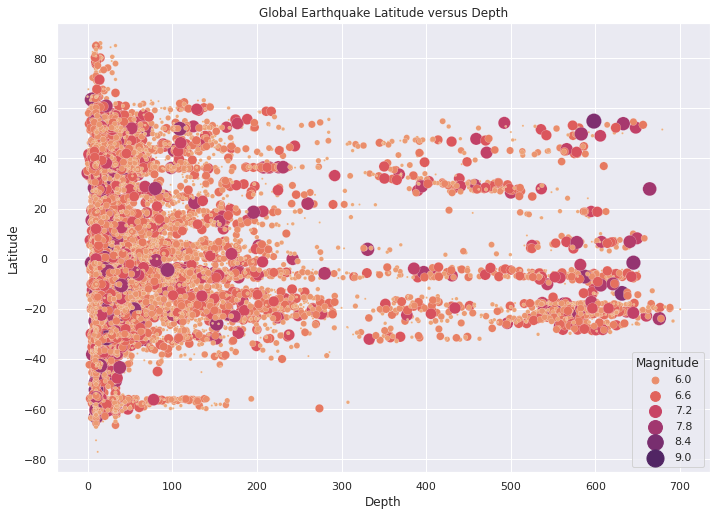

In [67]:
#Make a scatterplot of Depth and Latitude, showing magnitude by color and size
minsize = min([5])
maxsize = max([300])
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("flare", as_cmap=True)
sns.scatterplot(x = 'Depth', y = 'Latitude', size = 'Magnitude', sizes = (minsize, maxsize), hue = 'Magnitude', palette = (palette), data = dc)
plt.title('Global Earthquake Latitude versus Depth')
plt.show()

###Pearson correlation coefficient (r) for measuring a linear correlation between  Earthquake Latitude and Depth

In [68]:
# Pearson correlation coefficient (r) for measuring a linear correlation
# between  Earthquake Latitude and Depth 

stats.pearsonr(dc['Latitude'], dc['Depth'])

(-0.0762902795549158, 2.4461795101956743e-31)

###**RESULTS**---A Pearson product-moment correlation coefficient was computed to assess the relationship between Latitude and Depth of historical earthquakes in the dataset. There was a weak negative correlation between the two variables, r = -0.076. The test is significant (p = 2.44e-31). The Latitude of an earthquake is correlated with the depth at which it occurs.  There are some specific Latitudes where the depths have a much wider range.  There is also an interesting sparser occurance of earthquakes around the 300 foot depth for all Latitudes.

###***Hypothesis III***
>>**Hypothesis III**
Null Hypothesis II (H0): The depths of historical earthquakes are not correlated with Longitude.  This means, we are assuming that Longitude do not drive the depth of the earthquake.
Alternate Hypothesis II (Ha): The depths of historical earthquakes are correlated with Longitude.

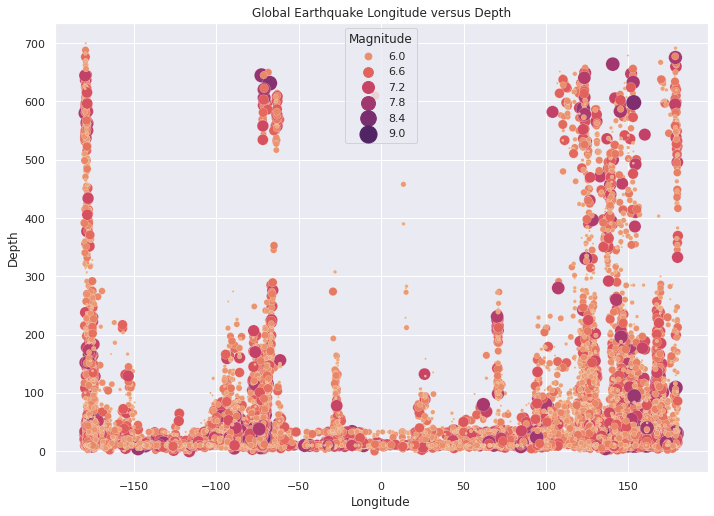

In [69]:
#Make a scatterplot of Longitude and Depth, showing magnitude by color and size
minsize = min([5])
maxsize = max([300])
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("flare", as_cmap=True)
sns.scatterplot(x = 'Longitude', y = 'Depth', size = 'Magnitude', sizes = (minsize, maxsize), hue = 'Magnitude', palette = (palette), data = dc)
plt.title('Global Earthquake Longitude versus Depth')
plt.show()

###Pearson correlation coefficient (r) for measuring a linear correlation between  Earthquake Longitude and Depth


In [70]:
# Pearson correlation coefficient (r) for measuring a linear correlation
# between  Earthquake Longitude and Depth 

stats.pearsonr(dc['Longitude'], dc['Depth'])

(-0.08662436069935764, 6.089171213507565e-40)

###**RESULTS**---A Pearson product-moment correlation coefficient was computed to assess the relationship between Longitude and Depth of historical earthquakes in the dataset. There was a weak negative correlation between the two variables, r = -0.087. The test is significant (p = 6.09e-40). The Longitude of an earthquake is correlated with the depth at which it occurs.  Although not a linear correlation, the scatterplot shows that specific Longitudes have earthquakes with a much larger range than others.

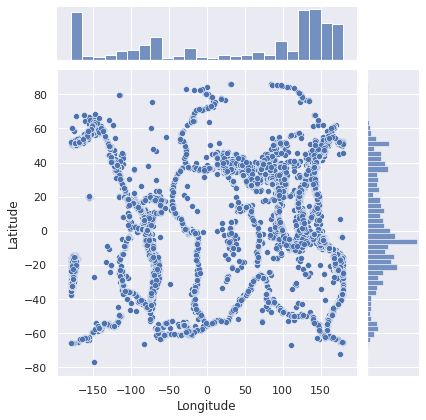

In [71]:
sns.jointplot(x="Longitude", y="Latitude", data=dc)

#2. Is there a significant difference between the means of depths between the Northern & Southern Hemispheres. t-test to see if there is a significant difference in the means of depth occurrences between the Northern and Southern Hemispheres.

>**Hypothesis IIII**
Null Hypothesis III (H0): The depths of historical earthquakes are the same for the Northern Hemisphere and Southern Hemisphere.
Alternate Hypothesis III (Ha): The depths of historical earthquakes are different for the Northern Hemisphere and Southern Hemisphere.

###Prepare data by splitting the data into historical earthquakes in the Northern Hemisphere and Southern Hemisphere to run a t-test

In [72]:
#Split the data for a t-test (Southern Hemisphere)
sh = dc[dc['Hemisphere'] == 'SH']
sh

,Date,Latitude,Longitude,Depth,Magnitude,Hemisphere
2,1/5/1965,-20.5790,-173.9720,20.00,6.2,SH
3,1/8/1965,-59.0760,-23.5570,15.00,5.8,SH
5,1/10/1965,-13.4050,166.6290,35.00,6.7,SH
7,1/15/1965,-13.3090,166.2120,35.00,6.0,SH
8,1/16/1965,-56.4520,-27.0430,95.00,6.0,SH
...,...,...,...,...,...,...
23401,12/24/2016,-5.2453,153.5754,35.00,6.0,SH
23402,12/24/2016,-5.1460,153.5166,30.00,5.8,SH
23403,12/25/2016,-43.4029,-73.9395,38.00,7.6,SH
23404,12/25/2016,-43.4810,-74.4771,14.93,5.6,SH


In [73]:
#Split the data for a t-test (Northern Hemisphere)
nh = dc[dc['Hemisphere'] == 'NH']
nh

,Date,Latitude,Longitude,Depth,Magnitude,Hemisphere
0,1/2/1965,19.2460,145.6160,131.60,6.0,NH
1,1/4/1965,1.8630,127.3520,80.00,5.8,NH
4,1/9/1965,11.9380,126.4270,15.00,5.8,NH
6,1/12/1965,27.3570,87.8670,20.00,5.9,NH
12,1/29/1965,54.6360,161.7030,55.00,5.5,NH
...,...,...,...,...,...,...
23406,12/28/2016,38.3754,-118.8977,10.80,5.6,NH
23407,12/28/2016,38.3917,-118.8941,12.30,5.6,NH
23408,12/28/2016,38.3777,-118.8957,8.80,5.5,NH
23409,12/28/2016,36.9179,140.4262,10.00,5.9,NH


#2 Sample t-test testing earthquake depth for the Northern and Southern Hemispheres

>**Hypothesis IIII**
Null Hypothesis IIII (H0): The depths of historical earthquakes are the same for the Northern Hemisphere and Southern Hemisphere.
Alternate Hypothesis IIII (Ha): The depths of historical earthquakes are different for the Northern Hemisphere and Southern Hemisphere.

##Create a box plot of earthquake depth to Northern & Southern Hemispheres

In [74]:
stats = dc.groupby(['Hemisphere'])['Depth'].agg(['mean', 'count', 'std'])
print(stats)
print('-'*30)

ci95_hi = []
ci95_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats)

                 mean  count         std
Hemisphere                              
NH          54.140160  10468   88.401625
SH          85.398437  12764  143.784949
------------------------------
                 mean  count         std    ci95_hi    ci95_lo
Hemisphere                                                    
NH          54.140160  10468   88.401625  55.833657  52.446662
SH          85.398437  12764  143.784949  87.892894  82.903979


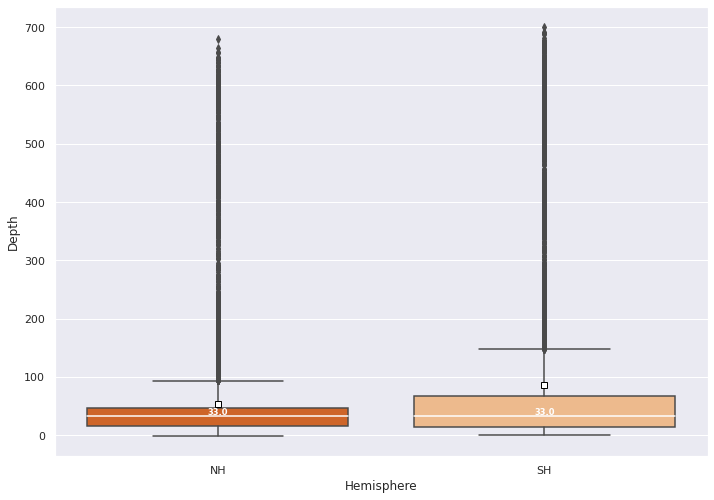

In [75]:
box_plot = sns.boxplot(y = dc['Depth'], x = dc['Hemisphere'], palette= 'Oranges_r', medianprops={'color':'white'}, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
medians = dc.groupby(['Hemisphere'])['Depth'].median()
means = dc.groupby(['Hemisphere'])['Depth'].mean()
vertical_offset = dc['Depth'].median() * 0.05 # offset from median for display
for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

###**equal_var**: if True, perform a standard independent 2 sample t-test that assumes equal population variances. If False, perform Welch’s t-test, which does not assume equal population variances. This is True by default.

In [78]:
stats.ttest_ind(nh['Depth'], sh['Depth'],equal_var=False)

Ttest_indResult(statistic=-20.32044367035303, pvalue=5.990257945625826e-91)

In [79]:
mean, sigma = np.mean(nh['Depth']), np.std(sh['Depth'])

conf_int = stats.norm.interval(0.95, loc=mean, 
    scale=sigma)


###**RESULTS**---The analysis shows p-value significantly lower than 0.05,  It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random).Therefore, we reject the null hypothesis, and accept the alternative hypothesis. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis. There is a statistically significant difference between depths of historical earthquakes in the Northern Hemiphere and the Southern Hemisphere. 

##Confidence Interval on Hemisphere and Depths

In [80]:
# Calculate the sample size, mean, and variance of each sample.
# You will need this information to calculate standard errors.

sample_1_n = nh.shape[0]
sample_2_n = sh.shape[0]
sample_1_mean = nh['Depth'].mean()
sample_2_mean = sh['Depth'].mean()
sample_1_var = nh['Depth'].var()
sample_2_var = sh['Depth'].var()

In [81]:
#Calculate the standard error and compute the confidence intervals.
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between 28.243273093510496 and 34.27328154615658.


#**SUMMARY**


###**Hypothesis I**
>>**Hypothesis I**
Null Hypothesis I (H0): The Latitude of historical earthquakes are not correlated with the Longitudes they occur.  This means, we are assuming that Longitudes do not drive the Latitudes of the earthquake.
Alternate Hypothesis I (Ha): The Latitude of historical earthquakes are correlated with the Longitudes they occur.

>>**RESULTS**---A Pearson product-moment correlation coefficient was computed to assess the relationship between Latitude and Longitude of historical earthquakes in the dataset.  There was a weak positive correlation between the two variables, r = 0.203  The test is significant (p= 6.68e-214), therefore the Null hypothesis is rejected, proving the alternate hypothesis is true. The Latitude of an earthquake is correlated with the Longitude at which it occurs. Although the correlation is not linear, there is a definite pattern that outlines the tectonic plates of the Earth.
###**Hypothesis II**
>>**Hypothesis II**
Null Hypothesis I (H0): The depths of historical earthquakes are not correlated with Latitude.  This means, we are assuming that Latitude do not drive the depth of the earthquake.
Alternate Hypothesis I (Ha): The depths of historical earthquakes are correlated with Latitude.

>>**RESULTS**---A Pearson product-moment correlation coefficient was computed to assess the relationship between Latitude and Depth of historical earthquakes in the dataset. There was a weak negative correlation between the two variables, r = -0.076. The test is significant (p = 2.44e-31), therefore the Null hypothesis is rejected, proving the alternate hypothesis is true. The Latitude of an earthquake is correlated with the depth at which it occurs.  There are some specific Latitudes where the depths have a much wider range.  There is also an interesting sparser occurrence of earthquakes around the 300 feet depth for all Latitudes.
###***Hypothesis III***
>>**Hypothesis III**
Null Hypothesis II (H0): The depths of historical earthquakes are not correlated with Longitude.  This means, we are assuming that Longitude do not drive the depth of the earthquake.
Alternate Hypothesis II (Ha): The depths of historical earthquakes are correlated with Longitude.

>>**RESULTS**---A Pearson product-moment correlation coefficient was computed to assess the relationship between Longitude and Depth of historical earthquakes in the dataset. There was a weak negative correlation between the two variables, r = -0.087. The test is significant (p = 6.09e-40), therefore the Null hypothesis is rejected, proving the alternate hypothesis true. The Longitude of an earthquake is correlated with the depth at which it occurs.  Although not a linear correlation, the scatterplot shows that specific Longitudes have earthquakes with a much larger range of depths than others.
###**Hypothesis IIII**
>>**Hypothesis IIII** Null Hypothesis IIII (H0): The depths of historical earthquakes are the same for the Northern Hemisphere and Southern Hemisphere.
Alternate Hypothesis IIII (Ha): The depths of historical earthquakes are different for the Northern Hemisphere and Southern Hemisphere.

>>**RESULTS**---The analysis shows p-value significantly lower than 0.05, therefore the Null is rejected, proving the Alternate hypothesis is True. There is a statistically significant difference between depths of historical earthquakes in the Northern Hemisphere and the Southern Hemisphere.

#**RECOMMENDATIONS**
Although earthquakes cannot be prevented, the risks can be mitigated. Ultimately, scientists would be able to predict when and where an earthquake was going to occur with enough time to move people out of harm’s way.
Until that is possible, governments, NGOs, and the population of the world can use the information in this analysis to narrow down their individual risks for an earthquake occurring in their location.
There are certain Latitudes and Longitudes that are at higher risks than others.  Most significantly, an accumulation of earthquakes tends to occur along the tectonic boundaries.
There is also an interesting sparser occurrence of earthquakes around the 300 foot depth for all Latitudes an all Longitudes.
Based upon individual locations, a closer risk analysis should be considered to drive decisions of local building codes, prioritize preparedness for emergency responders to respond to consequences, and have a recovery plan in place.

#EXTRA HYPOTHESIS
>**Hypothesis IIII**
Null Hypothesis IIII (H0): The depths of historical earthquakes are the same for the Northern Hemisphere and Southern Hemisphere.
Alternate Hypothesis IIII (Ha): The depths of historical earthquakes are different for the Northern Hemisphere and Southern Hemisphere.
##2 Sample t-test testing earthquake magnitude for the Northern and Southern Hemispheres

In [82]:
#Run 2 sample t-test
stats.ttest_ind(nh['Magnitude'], sh['Magnitude'])

Ttest_indResult(statistic=3.056814419755643, pvalue=0.002239567547650876)

###**RESULTS**---The analysis shows p-value = 0.002, therefore the Null is rejected, proving the Alternate hypothesis is True. There is a statistically significant difference between magnitudes of historical earthquakes in the Northern Hemiphere and the Southern Hemisphere. 

###Create a box plot of earthquake Magnitude to Northern & Southern Hemispheres

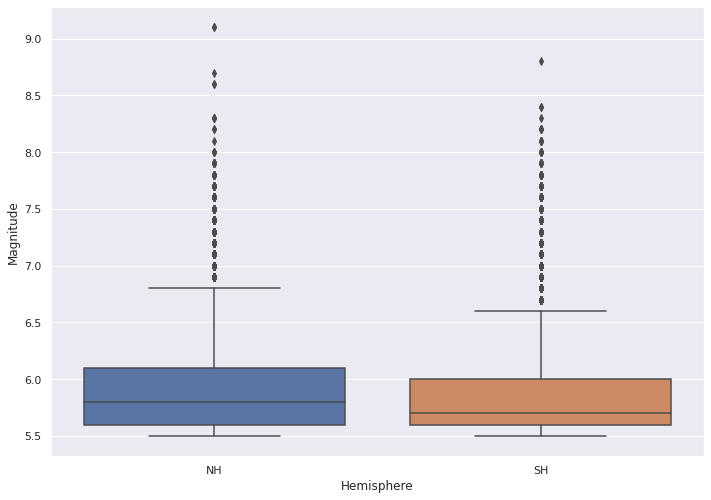

In [83]:
sns.boxplot(y = dc['Magnitude'], x = dc['Hemisphere'])